In [1]:
import pandas as pd
import numpy as np

#train.csv 읽어 df에 저장
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Pclass Sex Embarked
train_df[['Pclass', 'Sex', 'Embarked']].head()
train_df.isnull().sum()
# Age : 비어 있는 값을 나이의 평균으로 채우기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [3]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# test.csv 읽어 test_df에 저장
test_df = pd.read_csv('test.csv')
test_df.isnull().sum()
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Fare NaN을 평균으로 대체
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [7]:
# SibSp와 Parch를 더하여 Family size 생성
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch']
test_df['FamilySize'] = test_df['SibSp']+test_df['Parch']

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [10]:
# Cabin(객실) 정보에서 번호만 삭제하고 알파벳만 남기기
train_df['Cabin']=train_df['Cabin'].str[0]
# NaN 가장 많은 값으로 대체
train_df['Cabin'].value_counts()
train_df['Cabin'] = train_df['Cabin'].fillna('C')

In [11]:
test_df['Cabin']=test_df['Cabin'].str[0]
# NaN 가장 많은 값으로 대체
test_df['Cabin'].value_counts()
test_df['Cabin'] = test_df['Cabin'].fillna('C')

In [12]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [14]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [15]:
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [16]:
train_df['Cabin']

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: Cabin, Length: 891, dtype: object

In [17]:
test_df['Cabin'].value_counts()

C    362
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [18]:
# 문자를 숫자로 변환(C==>0 / B==>1 / D==>2 / E==>3)
# train_df.loc[train_df['Cabin'] == 'C', 'Cabin'] = 0
train_df['Cabin'] = train_df['Cabin'].map({
    'C' : 0,
    'B' : 1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7
})

In [19]:
train_df['Cabin'].value_counts()

0    746
1     47
2     33
3     32
4     15
5     13
6      4
7      1
Name: Cabin, dtype: int64

In [20]:
test_df['Cabin'] = test_df['Cabin'].map({
    'C' : 0,
    'B' : 1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7
})

In [21]:
test_df['Cabin'].value_counts()

0    362
1     18
2     13
3      9
5      8
4      7
6      1
Name: Cabin, dtype: int64

In [22]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# Embarked의 문자를 숫자로 변환 S=> 0 / C=> 1 / Q => 2
train_df['Embarked'] = train_df['Embarked'].map({
    'S' : 0,
    'C' : 1,
    'Q' : 2
})

In [24]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [25]:
test_df['Embarked'] = test_df['Embarked'].map({
    'S' : 0,
    'C' : 1,
    'Q' : 2
})

In [26]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
# Sex 문자를 숫자로 변환 male => 0 / female => 1
train_df['Sex']=train_df['Sex'].map({
    'male' : 0,
    'female' : 1
})

In [28]:
test_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [29]:
test_df['Sex']=test_df['Sex'].map({
    'male' : 0,
    'female' : 1
})

In [30]:
# 필요없는 열 삭제 'Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'
train = train_df.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'])
test = test_df.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'])

In [31]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,2


In [32]:
# Training set
# 모델의 학습에 사용되는 데이터

# Validation set
# 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터

# Test set 모델의 최종 성능을 평가하기 위한 데이터

In [33]:
# 훈련용 데이터에서 데이터, label(target) 분리
train_data = train.drop('Survived', axis=1) # 학습용데이터
target_data = train['Survived'] # 학습용데이터의 label(target)
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,22.0,7.2500,0,0,1
1,1,1,38.0,71.2833,0,1,1
2,3,1,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,0,1
4,3,0,35.0,8.0500,0,0,0


In [34]:
target_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_data, target_data)
print(train_data.shape, X_train.shape, X_valid.shape)

(891, 7) (668, 7) (223, 7)


In [36]:
# sklearn 의 DecisionTreeClassifier를 사용하여 학습
from sklearn.tree import DecisionTreeClassifier
# DecisionTree로 모델 생성
tree_dec = DecisionTreeClassifier()
# 학습
tree_dec.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
print('training set accuracy :', tree_dec.score(X_train, Y_train))
print('Validation set accuracy :', tree_dec.score(X_valid, Y_valid))

training set accuracy : 0.9850299401197605
Validation set accuracy : 0.7668161434977578


In [38]:
# 만들어진 DecisionTree로 test 데이터 판단
prediction = tree_dec.predict(test)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
submit = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : prediction
})
submit.to_csv('survived.csv', index=False)

In [40]:
pd.read_csv('survived.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[Text(532.5524168719212, 906.3484615384616, 'Sex <= 0.5\ngini = 0.47\nsamples = 668\nvalue = [416, 252]\nclass = Unsurvived'),
 Text(184.32087878254748, 870.8053846153847, 'Age <= 3.5\ngini = 0.296\nsamples = 437\nvalue = [358, 79]\nclass = Unsurvived'),
 Text(25.131597466572835, 835.2623076923078, 'FamilySize <= 3.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]\nclass = Survived'),
 Text(12.565798733286417, 799.7192307692309, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Survived'),
 Text(37.697396199859256, 799.7192307692309, 'FamilySize <= 5.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Unsurvived'),
 Text(25.131597466572835, 764.176153846154, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Unsurvived'),
 Text(50.26319493314567, 764.176153846154, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(343.51016009852214, 835.2623076923078, 'Pclass <= 1.5\ngini = 0.267\nsamples = 422\nvalue = [355, 67]\nclass = Unsurvived'),
 Text(119.37508796622096, 799.719

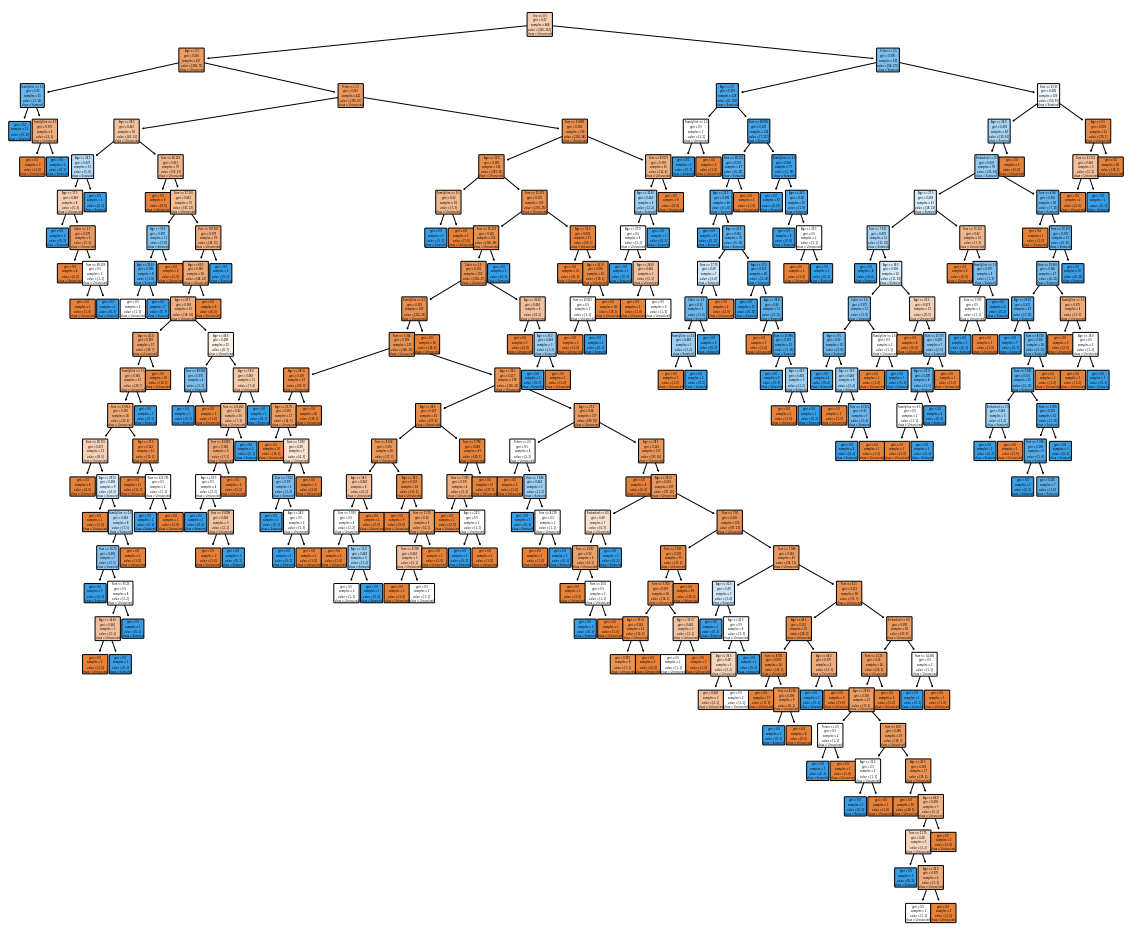

In [41]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 17))
feature_name=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize']
tree.plot_tree(tree_dec, class_names=['Unsurvived', 'Survived'], feature_names=feature_name, impurity=True, filled=True, rounded=True)

In [42]:
print('importance : ', tree_dec.feature_importances_)

importance :  [0.09483548 0.32295999 0.24883542 0.25086227 0.00617256 0.02041907
 0.05591521]


In [43]:
for name, value in zip(feature_name, tree_dec.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

Pclass: 0.095
Sex: 0.323
Age: 0.249
Fare: 0.251
Cabin: 0.006
Embarked: 0.020
FamilySize: 0.056


<AxesSubplot:>

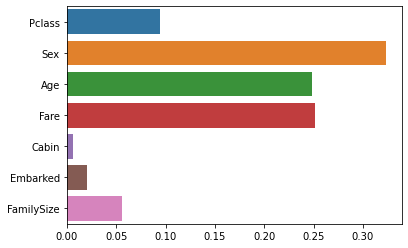

In [46]:
import seaborn as sns
sns.barplot(x=tree_dec.feature_importances_, y=feature_name)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [68]:
# parameters = {
#     'max_depth' : [8, 10, 12, 15],
#     'min_samples_split' : [4, 5, 7],
#     'min_samples_leaf' : [1, 2, 3]
# }
parameters = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split' : [4, 5, 6, 7, 8, 9],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
grid_dclf = GridSearchCV(tree_dec, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [69]:
grid_dclf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [70]:
print(f'GridSearchCV 최적 하이퍼 파라미터: {grid_dclf.best_params_}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7}


In [76]:
print(f'GridSearchCV 최고 정확도: {round(grid_dclf.best_score_, 4)}')

GridSearchCV 최고 정확도: 0.8308


In [73]:
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_valid)
accuracy = accuracy_score(Y_valid, dpredictions)

print(f'테스트 세트에서의 DecisionTreeClassifier정확도: {round(accuracy, 4)}')

테스트 세트에서의 DecisionTreeClassifier정확도: 0.7803


In [80]:
tree_dec.fit(X_train, Y_train)
dt_pred = tree_dec.predict(X_valid)
print('tree_dec DecisionTreeClassifier정확도 : {0:.4f}'.format(accuracy_score(Y_valid, dt_pred)))

tree_dec DecisionTreeClassifier정확도 : 0.7758


In [81]:
Y_valid.shape

(223,)

In [83]:
length = Y_valid.shape[0]
accuracy = accuracy_score(Y_valid, dt_pred)
print(f'총 {length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총 223명 중 77.578% 정확도로 생존을 맞춤


In [86]:
best_accuracy = accuracy_score(Y_valid, dpredictions)
print(f'총 {length}명 중 {best_accuracy * 100:.3f}% 정확도로 생존을 맞춤')

총 223명 중 78.027% 정확도로 생존을 맞춤 히히히 희건이


[Text(500.5588235294117, 847.1100000000001, 'Sex <= 0.5\ngini = 0.47\nsamples = 668\nvalue = [416, 252]\nclass = Unsurvived'),
 Text(180.52941176470586, 693.0900000000001, 'Age <= 3.5\ngini = 0.296\nsamples = 437\nvalue = [358, 79]\nclass = Unsurvived'),
 Text(65.6470588235294, 539.0700000000002, 'FamilySize <= 3.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]\nclass = Survived'),
 Text(32.8235294117647, 385.05000000000007, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Survived'),
 Text(98.47058823529412, 385.05000000000007, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Unsurvived'),
 Text(295.4117647058823, 539.0700000000002, 'Pclass <= 1.5\ngini = 0.267\nsamples = 422\nvalue = [355, 67]\nclass = Unsurvived'),
 Text(164.1176470588235, 385.05000000000007, 'Age <= 28.5\ngini = 0.447\nsamples = 92\nvalue = [61, 31]\nclass = Unsurvived'),
 Text(98.47058823529412, 231.0300000000001, 'Age <= 24.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]\nclass = Survived'),
 Text(65.64705882352

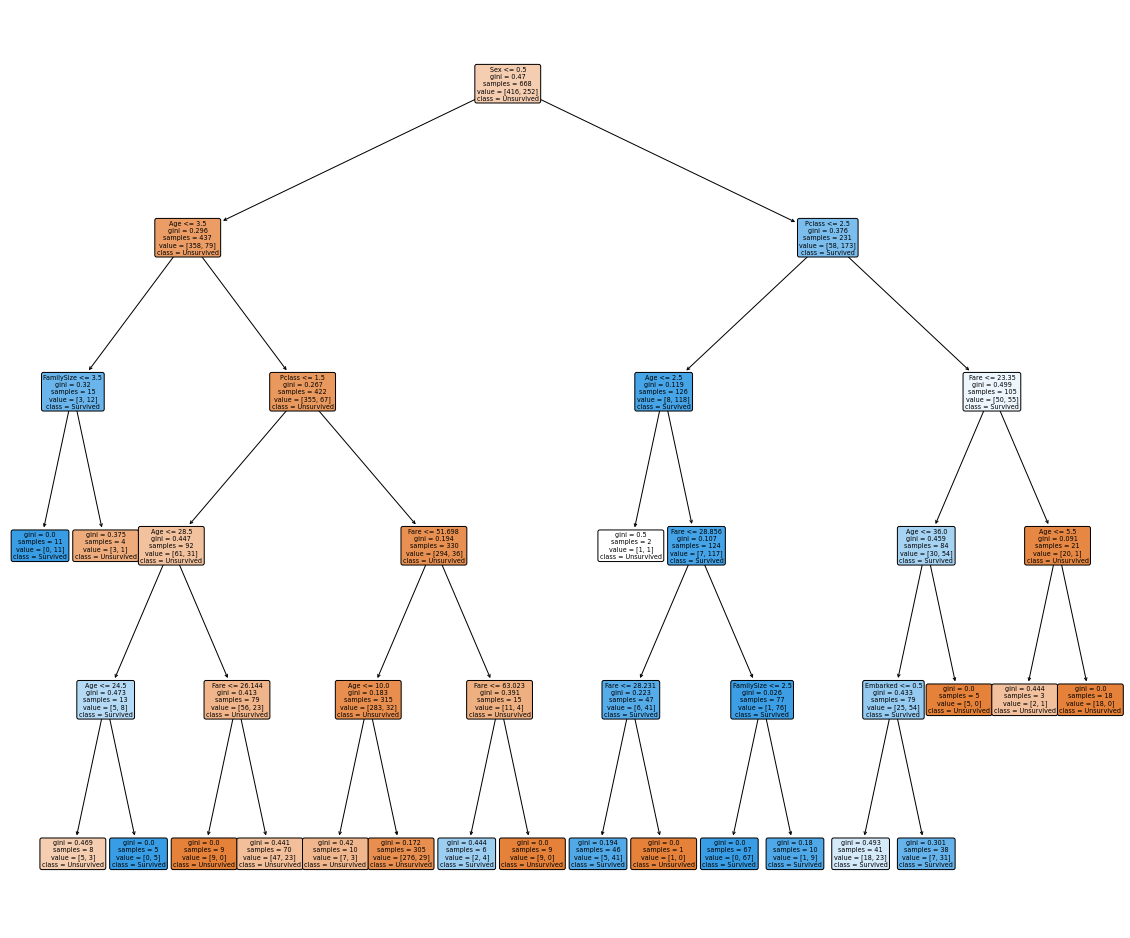

In [87]:
# 시각화 : 하이퍼파라미터 적용한 모델
plt.figure(figsize=(20, 17))
feature_name=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize']
tree.plot_tree(best_dclf, class_names=['Unsurvived', 'Survived'], feature_names=feature_name, impurity=True, filled=True, rounded=True)